In [6]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# specifying each path

In [7]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# loading training data

In [8]:
NUM_CLASSES = 8

# Loading training data

In [9]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [10]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model construction

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [13]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,158 (4.52 KB)

 Trainable params: 1,158 (4.52 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [16]:
model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/200
28/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1155 - loss: 2.2640
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1202 - loss: 2.2449 - val_accuracy: 0.2750 - val_loss: 2.0354
Epoch 2/200
33/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2160 - loss: 2.0558 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2178 - loss: 2.0526 - val_accuracy: 0.3774 - val_loss: 1.9411
Epoch 3/200
30/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2745 - loss: 1.9587 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2778 - loss: 1.9541 - val_accuracy: 0.4565 - val_loss: 1.8280
Epoch 4/200
32/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3267 - loss: 1.8634 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
37/3

In [17]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9069 - loss: 0.3793 


In [18]:

model = tf.keras.models.load_model(model_save_path)

In [19]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[1.0805778e-01 5.3547180e-01 3.5419601e-01 9.7587355e-04 1.6673430e-04
 9.0570147e-06 1.1050886e-05 1.1117480e-03]
1


# Confusion matrix

In [14]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


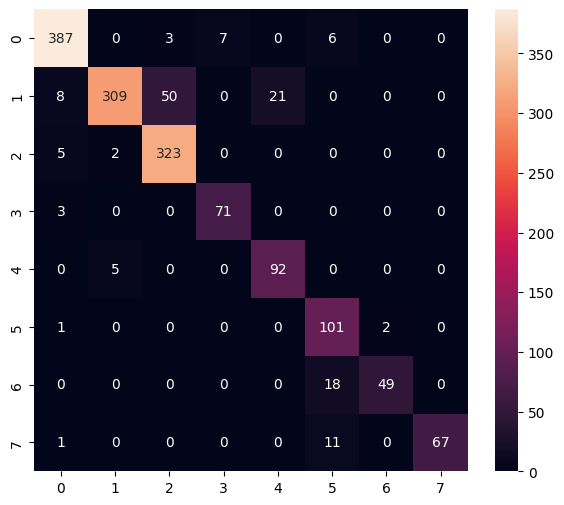

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       403
           1       0.98      0.80      0.88       388
           2       0.86      0.98      0.92       330
           3       0.91      0.96      0.93        74
           4       0.81      0.95      0.88        97
           5       0.74      0.97      0.84       104
           6       0.96      0.73      0.83        67
           7       1.00      0.85      0.92        79

    accuracy                           0.91      1542
   macro avg       0.90      0.90      0.89      1542
weighted avg       0.92      0.91      0.91      1542



In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite

In [21]:
model.save(model_save_path, include_optimizer=False)

In [22]:
import tensorflow as tf

In [23]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp1wefl489\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp1wefl489\assets


: 

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 75 µs, sys: 33 µs, total: 108 µs
Wall time: 107 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00656847 0.69891983 0.04854176 0.00194381 0.18333079 0.00545762
 0.05387836 0.00135925]
1
